In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras.layers as tfl
from keras.backend import clear_session

In [2]:
dataset = datasets.load_digits()

In [3]:
dataset.images.shape

(1797, 8, 8)

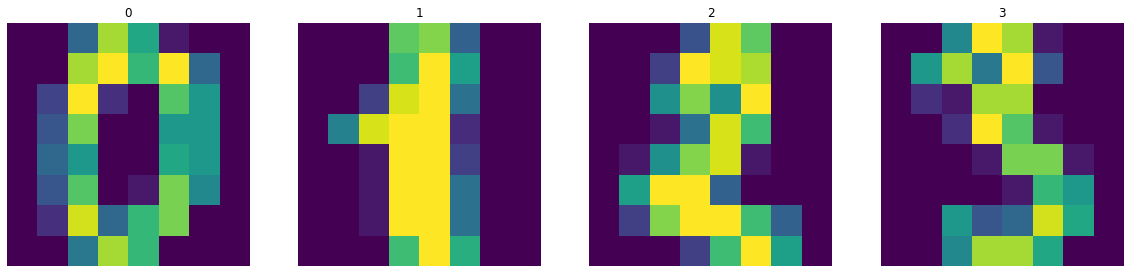

In [4]:
fig, axes = plt.subplots(1, 4, figsize=(20, 10))

for ax, image, label in zip(axes.flat, dataset.images, dataset.target):
    ax.set_axis_off()
    ax.imshow(image)
    ax.set_title(label)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(dataset.images, dataset.target, test_size=0.2, stratify=dataset.target)

In [6]:
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (1437, 8, 8)
Shape of X_test:  (360, 8, 8)
Shape of y_train:  (1437,)
Shape of y_test:  (360,)


In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
def int_encoder(arr):

    m = arr.shape[0]
    vector_len = len(np.unique(arr))

    new_arr = np.zeros((m, vector_len))

    for i in range(len(arr)):
        new_arr[i][arr[i]] = 1

    return new_arr


In [11]:
m_tr, h, w = X_train.shape
m_ts, h, w = X_test.shape

X_train = X_train.reshape((m_tr, h, w, 1))
X_test = X_test.reshape((m_ts, h, w, 1))

y_train = int_encoder(y_train)
y_test = int_encoder(y_test)

In [12]:
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (1437, 8, 8, 1)
Shape of X_test:  (360, 8, 8, 1)
Shape of y_train:  (1437, 10)
Shape of y_test:  (360, 10)


In [20]:
def build_conv_model(input_shape):
    input = tf.keras.Input(shape=input_shape)
    Z1 = tfl.Conv2D(4, (4, 4), padding='same')(input)
    A1 = tfl.LeakyReLU()(Z1)
    P1 = tfl.MaxPool2D(pool_size=(2, 2), strides=2)(A1)
    F = tfl.Flatten()(P1)
    output = tfl.Dense(units=10, activation='softmax')(F)
    return tf.keras.Model(inputs=input, outputs=output)

In [21]:
conv_model = build_conv_model((8, 8, 1))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8, 8, 1)]         0         
                                                                 
 conv2d (Conv2D)             (None, 8, 8, 4)           68        
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 8, 8, 4)           0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 4)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 10)                650       
                                                             

In [22]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)
clear_session()

Epoch 1/100
45/45 [==============================] - 1s 5ms/step - loss: 2.3020 - accuracy: 0.0905 - val_loss: 2.2959 - val_accuracy: 0.1444
Epoch 2/100
45/45 [==============================] - 0s 3ms/step - loss: 2.2905 - accuracy: 0.1280 - val_loss: 2.2823 - val_accuracy: 0.1306
Epoch 3/100
45/45 [==============================] - 0s 3ms/step - loss: 2.2746 - accuracy: 0.1663 - val_loss: 2.2625 - val_accuracy: 0.2222
Epoch 4/100
45/45 [==============================] - 0s 3ms/step - loss: 2.2516 - accuracy: 0.3138 - val_loss: 2.2348 - val_accuracy: 0.5278
Epoch 5/100
45/45 [==============================] - 0s 3ms/step - loss: 2.2199 - accuracy: 0.6019 - val_loss: 2.1974 - val_accuracy: 0.7556
Epoch 6/100
45/45 [==============================] - 0s 3ms/step - loss: 2.1785 - accuracy: 0.7272 - val_loss: 2.1500 - val_accuracy: 0.8056
Epoch 7/100
45/45 [==============================] - 0s 3ms/step - loss: 2.1275 - accuracy: 0.7599 - val_loss: 2.0932 - val_accuracy: 0.8056
Epoch 8/100
4

Epoch 59/100
45/45 [==============================] - 0s 3ms/step - loss: 0.3395 - accuracy: 0.9123 - val_loss: 0.3502 - val_accuracy: 0.9028
Epoch 60/100
45/45 [==============================] - 0s 5ms/step - loss: 0.3338 - accuracy: 0.9130 - val_loss: 0.3453 - val_accuracy: 0.9056
Epoch 61/100
45/45 [==============================] - 0s 4ms/step - loss: 0.3282 - accuracy: 0.9137 - val_loss: 0.3405 - val_accuracy: 0.9083
Epoch 62/100
45/45 [==============================] - 0s 3ms/step - loss: 0.3229 - accuracy: 0.9137 - val_loss: 0.3360 - val_accuracy: 0.9083
Epoch 63/100
45/45 [==============================] - 0s 3ms/step - loss: 0.3177 - accuracy: 0.9144 - val_loss: 0.3316 - val_accuracy: 0.9083
Epoch 64/100
45/45 [==============================] - 0s 3ms/step - loss: 0.3127 - accuracy: 0.9144 - val_loss: 0.3273 - val_accuracy: 0.9056
Epoch 65/100
45/45 [==============================] - 0s 3ms/step - loss: 0.3079 - accuracy: 0.9151 - val_loss: 0.3232 - val_accuracy: 0.9056
Epoch 

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

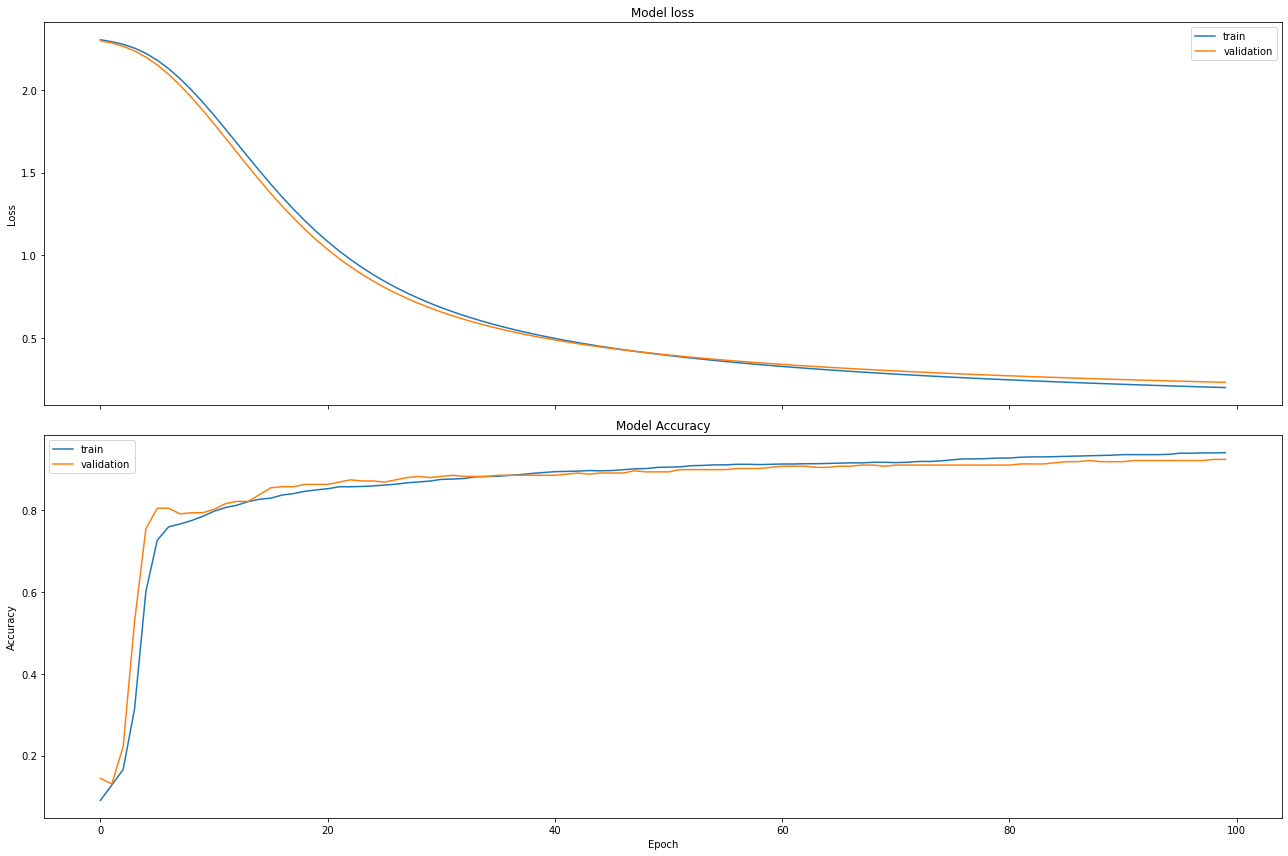

In [25]:
figure, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(36, 24))

df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']].copy(deep=True)
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']].copy(deep=True)
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)

df_loss.plot(ax=ax1, title='Model loss', figsize=(18,12)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(ax=ax2, title='Model Accuracy',figsize=(18,12)).set(xlabel='Epoch',ylabel='Accuracy')

figure.tight_layout()

In [26]:
preds = conv_model.predict(X_test)

In [27]:
preds.shape

(360, 10)

In [28]:
predicted = [np.argmax(preds[i]) for i in range(preds.shape[0])]
y_test2 = [np.argmax(y_test[i]) for i in range(y_test.shape[0])]

In [29]:
print(metrics.classification_report(y_test2, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.76      0.78      0.77        36
           2       0.94      0.89      0.91        35
           3       0.97      0.95      0.96        37
           4       0.97      0.92      0.94        36
           5       0.95      0.97      0.96        37
           6       1.00      0.97      0.99        36
           7       0.97      0.92      0.94        36
           8       0.86      0.91      0.89        35
           9       0.85      0.94      0.89        36

    accuracy                           0.93       360
   macro avg       0.93      0.92      0.93       360
weighted avg       0.93      0.93      0.93       360



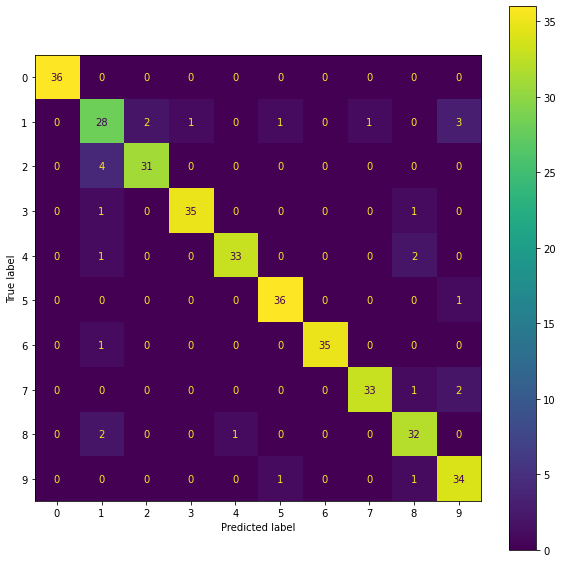

In [30]:
cm = confusion_matrix(y_test2, predicted)

cmd = ConfusionMatrixDisplay(cm, display_labels=dataset.target_names)
figure, ax = plt.subplots(figsize=(10, 10))
cmd.plot(ax=ax)